# 1、词作者的词云绘制

### 1.1 连接数据库
>连接到数据包中默认的ci.db文件即可

In [3]:
import sqlite3
conn=sqlite3.connect("../data/database/ci.db")
print ('Opened database successfully')

Opened database successfully


### 1.2 执行SQL语句
> 选择数据库中的作者属性，并且抛去无名氏这一称呼，确保输出的都是人名而非代指，将每条数据中出现的作者依次存放入一个列表中

In [4]:
c = conn.cursor()
result=[]

cursor = c.execute("SELECT author from ci")
for row in cursor:
    author=""
    for w in row:
        if(w!="'") and (w!=","):
            author=author+w 
    if(author!="无名氏"):
        result.append(author)
print(result[:10])

['和岘', '和岘', '和岘', '王禹', '苏易简', '寇准', '寇准', '寇准', '寇准', '寇准']


In [7]:
author=""
for i in result:
    author = author + i + " "
print(len(author))

68874


### 1.3 绘制词云
> 选取了一张中国地图作为背景的形状图片

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from matplotlib import colors

In [11]:
mask=np.array(Image.open("china.jpg"))

> 配置颜色列表，用wordcloud库绘制词云，设置了字体大小等等一系列的基本属性，并将绘制的图片分别进行保存和输出，得到***“author_for_ci.png”***的词云图片

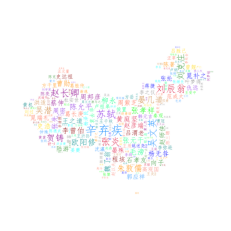

In [17]:
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']#建立颜色数组
colormap=colors.ListedColormap(color_list)#调用

wc = WordCloud(
        # 设置字体，不指定就会出现乱码
    font_path=font,
    mask=mask,
    collocations=False,
        # 设置背景色
    background_color='white',
        # 设置背景宽
    width=2000,
        # 设置背景高
    height=800,
        # 最大字体
    max_font_size=120,
        # 最小字体
    min_font_size=10,
    colormap=colormap,#设置颜色
    mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(author)
# 保存图片
wc.to_file(r"author_for_ci.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

# 2、词牌名的词云绘制

#### 同样使用先前已经建立连接的“ci.db”数据库即可，编写SQL语句将所有词牌名存入新的列表

In [18]:
c = conn.cursor()
result=[]

cursor = c.execute("SELECT rhythmic from ci")
for row in cursor:
    title=""
    for w in row:
        if(w!="'") and (w!=","):
            title=title+w 
    result.append(title)
print(result[1])

六州


#### 换了另一张图片作为背景

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
mask=np.array(Image.open("pic.jpg"))

#### 换了另一组颜色、字体等作为美化参数

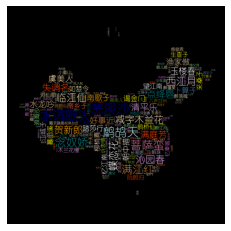

In [26]:
font = r'C:\Windows\Fonts\simyou.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

color_list=['#F0F8FF','#FFDEAD','#000080','#FDF5E6','#808000','#6B8E23','#FFA500','#FF4500','#DA70D6','#EEE8AA','#98FB98','#AFEEEE',
       '#DB7093', '#FFEFD5','#FFDAB9','#CD853F','#FFC0CB','#DDA0DD','#B0E0E6','#4682B4',
                '#D2B48C',
               '#008080',
              '#D8BFD8',
              '#FF6347',
            '#40E0D0',
              '#EE82EE',
               '#F5DEB3',
              '#FFFFFF',
           '#F5F5F5',
              '#FFFF00',
          '#9ACD32']#建立颜色数组
colormap=colors.ListedColormap(color_list)#调用

wc = WordCloud(
        # 设置字体，不指定就会出现乱码
    font_path=font,
    mask=mask,
    collocations=False,
        # 设置背景色
    background_color='black',
        # 设置背景宽
    width=1500,
        # 设置背景高
    height=650,
        # 最大字体
    max_font_size=120,
        # 最小字体
    min_font_size=10,
    colormap=colormap,
    mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(author)
# 保存图片
wc.to_file(r"rhythmic_for_ci.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

## 3、唐诗作者的词云绘制

>方法与宋词作者词云绘制基本一致，只是使用数据库不同。
使用本小组将所有古诗导入到数据库的poet.db文件进行数据源

In [34]:
import sqlite3
conn=sqlite3.connect("../data/database/poet.db")
print ('Opened database successfully')

Opened database successfully


In [35]:
c = conn.cursor()
result=""

cursor = c.execute("SELECT author from poet")
for row in cursor:
    author=""
    for w in row:
        if(w!="'") and (w!=","):
            author=author+w 
    result=result+" "+author
    #result.append(author)
print(result[1])

宋


In [36]:
author=""
for i in result:
    author=author+i+" "
#print(author)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
mask=np.array(Image.open("pic.jpg"))

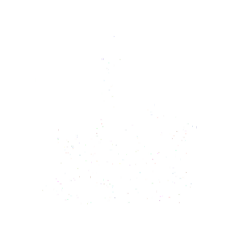

In [43]:
font = r'C:\Windows\Fonts\simfang.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

color_list = ['#87CEFA', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', '#66CDAA', '#0000CD', '#BA55D3', '#9370DB', '#3CB371', '#7B68EE', '#00FA9A', '#48D1CC', '#C71585', '#191970', '#F5FFFA', '#FFE4E1', '#FFE4B5', '#FFDEAD', '#000080', '#FDF5E6', '#808000', '#6B8E23', '#FFA500', '#FF4500', '#DA70D6', '#EEE8AA', '#98FB98', '#AFEEEE', '#DB7093', '#FFEFD5', '#FFDAB9', '#CD853F', '#FFC0CB', '#DDA0DD', '#B0E0E6', '#800080', '#FF0000', '#BC8F8F', '#4169E1', '#8B4513', '#FA8072', '#FAA460', '#2E8B57', '#FFF5EE', '#A0522D', '#C0C0C0', '#87CEEB', '#6A5ACD', '#708090', '#FFFAFA', '#00FF7F', '#4682B4', '#D2B48C', '#008080', '#D8BFD8', '#FF6347', '#40E0D0', '#EE82EE', '#F5DEB3', '#FFFFFF', '#F5F5F5', '#FFFF00', '#9ACD32']
colormap=colors.ListedColormap(color_list)#调用

wc = WordCloud(
        # 设置字体，不指定就会出现乱码
    font_path=font,
    mask=mask,
    collocations=False,
        # 设置背景色
    background_color='white',
        # 设置背景宽
    width=500,
        # 设置背景高
    height=350,
        # 最大字体
    max_font_size=30,
        # 最小字体
    min_font_size=5,
    colormap=colormap,
    mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(result)
# 保存图片
wc.to_file(r"author_for_poet.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

# 4、词内容的词云绘制
- 使用本小组将所有文本导入到数据库的text.db文件进行数据源
>原因：
> + 由于诗词文章内容本身数据质量参差不齐，因此采用清洗过后的数据库，保证质量
> + 每一条数据都存在 *“>>词牌介绍”* 这一数据，影响最终词云效果因此要清除

In [44]:
import sqlite3
conn=sqlite3.connect("../data/database/texts.db")
print ('Opened database successfully')

Opened database successfully


In [45]:
c = conn.cursor()
data=[]

cursor = c.execute("SELECT texts from ci")
for row in cursor:
    data.append(row)
#print(type(data[1]))

- 内容使用中文分词库jieba库进行分词

In [30]:
import jieba
import numpy as np
import pandas as pd

def fenci(train_data):
    words_df = ' '.join(jieba.cut(str(train_data)))
    return words_df

x_fenci = []
for i in range(len(data)):
    x_fenci.append(fenci(str(data[i])))

x_fenci[:5]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jojo\AppData\Local\Temp\jieba.cache
Loading model cost 0.893 seconds.
Prefix dict has been built succesfully.


["( ' 气和玉烛 ， 睿化 著鸿明 。   缇 管 一阳生 。   郊盛礼 燔 柴 毕 ， 旋轸 凤凰 城 。   森罗 仪卫 振华 缨 。   载路溢 欢声 。   皇图 大业 超前 古 ， 垂象 泰阶平 。   岁 时 丰衍 ， 九土 乐升平 。   睹 寰海 澄清 。   道 高 尧舜 垂衣治 ， 日月 并 文明 。   嘉禾 甘露 登歌荐 ， 云物 焕祥经 。   兢兢惕惕 持谦德 ， 未许 禅云亭 。 ' , )",
 "( ' 严 夜警 ， 铜莲漏 迟迟 。   清禁肃 ， 森 陛戟 ， 羽卫 俨 皇闱 。   角声励 ， 钲 鼓攸宜 。   金管 成雅 奏 ， 逐吹 逶迤 。   荐 苍 璧 ， 郊祀 神祗 。   属景 运纯禧 。   京坻 丰衍 ， 群材 乐育 ， 诸侯 述职 ， 盛德 服 蛮夷 。   殊祥萃 ， 九苞丹 凤来仪 。   膏露 降 ， 和 气洽 ， 三秀焕 灵芝 。   鸿猷播 ， 史册 相辉 。   张 四维 。   卜世 永固 丕 基 。   敷玄化 ， 荡荡 无为 。   合 尧舜 文思 。   混 并 寰宇 ， 休牛归马 ， 销金 偃革 ， 蹈咏庆昌期 。 ' , )",
 "( ' 承宝运 ， 驯致 隆平 。   鸿庆 被 寰 瀛 。   时清俗 阜 ， 治定 功成 。   遐迩 咏 由庚 。   严 郊祀 ， 文物 声明 。   会 天正 、 星拱奏 严 更 。   布羽仪 簪缨 。   宸 心 虔洁 ， 明德 播惟馨 。   动 苍冥 。   神降享 精诚 。   燔 柴半 ， 万乘 移天 仗 ， 肃銮 辂 旋衡 。   千官 云拥 ， 群后 葵倾 。   玉帛 旅明庭 。   韶荐 ， 金奏 谐声 。   集休 亨 。   皇泽 浃 黎庶 ， 普率 洽恩荣 。   仰钦元 后 ， 睿 圣贯 三灵 。   万邦 宁 。   景贶 福千龄 。 ' , )",
 "( ' 雨恨云愁 ， 江南 依旧 称 佳丽 。   水村 渔市 。   一缕 孤烟细 。   天际 征鸿 ， 遥 认行 如缀 。   平生 事 。   此时 凝睇 。   谁 会 凭 阑意 。     ' , )",
 "( ' 神仙 神仙 瑶池 宴 。   片片 。   碧桃 零落 春风 晚 。   翠云 开处 ， 隐隐 金 舆 挽 。   玉麟 背 冷

In [46]:
result=""
for i in x_fenci:
    result=result+i+" "
#print(author)

In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
mask=np.array(Image.open("pic.jpg"))

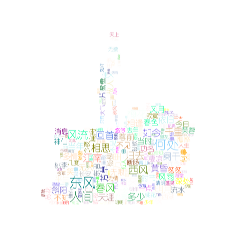

In [56]:
font = r'C:\Windows\Fonts\simyou.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

color_list = ['#87CEFA', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', '#66CDAA', '#0000CD', '#BA55D3', '#9370DB', '#3CB371', '#7B68EE', '#00FA9A', '#48D1CC', '#C71585', '#191970', '#F5FFFA', '#FFE4E1', '#FFE4B5', '#FFDEAD', '#000080', '#FDF5E6', '#808000', '#6B8E23', '#FFA500', '#FF4500', '#DA70D6', '#EEE8AA', '#98FB98', '#AFEEEE', '#DB7093', '#FFEFD5', '#FFDAB9', '#CD853F', '#FFC0CB', '#DDA0DD', '#B0E0E6', '#800080', '#FF0000', '#BC8F8F', '#4169E1', '#8B4513', '#FA8072', '#FAA460', '#2E8B57', '#FFF5EE', '#A0522D', '#C0C0C0', '#87CEEB', '#6A5ACD', '#708090', '#FFFAFA', '#00FF7F', '#4682B4', '#D2B48C', '#008080', '#D8BFD8', '#FF6347', '#40E0D0', '#EE82EE', '#F5DEB3', '#FFFFFF', '#F5F5F5', '#FFFF00', '#9ACD32']
colormap=colors.ListedColormap(color_list)#调用
    
wc = WordCloud(
    # 设置字体，不指定就会出现乱码
font_path=font,
mask=mask,
collocations=False,
    # 设置背景色
background_color='white',
    # 设置背景宽
width=500,
    # 设置背景高
height=350,
    # 最大字体
max_font_size=300,
    # 最小字体
min_font_size=50,
colormap=colormap,
mode='RGBA'
    #colormap='pink'
    )
# 产生词云
wc.generate(result)
# 保存图片
wc.to_file(r"text_for_poet.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

## 6、期刊内容的词云绘制
- 与词内容的词云绘制方法和过程基本一致

In [57]:
c = conn.cursor()
data=[]

cursor = c.execute("SELECT texts from journal")
for row in cursor:
    data.append(row)

In [58]:
x_fenci = []
for i in range(len(data)):
    x_fenci.append(fenci(str(data[i])))

x_fenci[:5]

["( ' 作者 程 苏东 ,   北京大学 中文系 讲师   ( 北京 100871 )   。 \\ n ' , )",
 "( ' “ 失控 的 文本 ” 这一 概念 是 我 在 研究 《 汉书 · 五行 志 》 体例 问题 时 产生 的 想法 。 班固 以 刘向 《 洪范 五行 传论 》 为 基础 ,   试图 纂集 董仲舒 《 春秋 》 灾异 说 、 许商 《 五行 传记 》 、 刘歆 《 洪范 五行 传论 》 等 不同 系统 的 灾异 学 论著 ,   整合 成 具有 集大成 性质 的 西汉 灾异 学 总论 ,   从 文本 生成 的 角度 而言 ,   《 汉书 · 五行 志 》 属于 典型 的 在 既有 文献 基础 上 编纂 而成 的 “ 衍生 型 文本 ” ,   而 从 其 文本 形态 的 层面 来说 ,   一方面 ,   班氏 未能 确立 一个 真正 可 容纳 诸家 异说 的 编排 体例 ,   另一方面 ,   其志文 内部 也 存在 自乱 体例 的 现象 ,   两者 导致 最终 呈现出 的 文本 体例 乖戾 ,   灾异 事例 重复 、 错置 之处 不一而足 ,   ( 1 )   具有 鲜明 的 “ 异质性 ” 。 可以 说 ,   《 汉书 · 五行 志 》 的 成书 形态 显然 未能 实现 \\ n ' , )",
 "( ' 班固 的 预期 ,   作为 “ 钞者 ”   ( 1 )   的 班固 并未 真正 控制 这个 由 他 生成 的 文本 ,   我们 见到 的 是 一个 “ 失控 的 文本 ” — — — 文本 的 编钞者 在 整合 多元 文本 来源 ,   或 尝试 将 某种 意识形态 植入 既有 文本 的 过程 中 ,   往往 难以 真正 弥合 异质性 文本 的 内在 张力 ,   文本 常 呈现出 割裂 、 重复 、 冗余 、 突兀 、 矛盾 等 多种 失序 现象 ,   对于 编钞者 而言 ,   文本 处于 不同 程度 的 “ 失控 ” 状态 。 类似 的 情况 还 包括 笔者 曾经 展开 过 个案研究 的 《 洪范 五行 传 》 、 《 春秋繁露 》 “ 五行 ” 诸篇 、 《 毛诗 正义 》 等 。   ( 2 )   对于 这些 异质性 文本 ,   传统 的 研究 大多 从 辨伪 学 、 校勘学 、 

In [59]:
result=""
for i in x_fenci:
    result=result+i+" "
#print(author)

KeyboardInterrupt: 

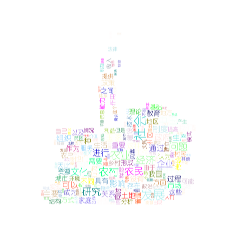

In [60]:
font = r'C:\Windows\Fonts\simyou.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

color_list = ['#87CEFA', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', '#66CDAA', '#0000CD', '#BA55D3', '#9370DB', '#3CB371', '#7B68EE', '#00FA9A', '#48D1CC', '#C71585', '#191970', '#F5FFFA', '#FFE4E1', '#FFE4B5', '#FFDEAD', '#000080', '#FDF5E6', '#808000', '#6B8E23', '#FFA500', '#FF4500', '#DA70D6', '#EEE8AA', '#98FB98', '#AFEEEE', '#DB7093', '#FFEFD5', '#FFDAB9', '#CD853F', '#FFC0CB', '#DDA0DD', '#B0E0E6', '#800080', '#FF0000', '#BC8F8F', '#4169E1', '#8B4513', '#FA8072', '#FAA460', '#2E8B57', '#FFF5EE', '#A0522D', '#C0C0C0', '#87CEEB', '#6A5ACD', '#708090', '#FFFAFA', '#00FF7F', '#4682B4', '#D2B48C', '#008080', '#D8BFD8', '#FF6347', '#40E0D0', '#EE82EE', '#F5DEB3', '#FFFFFF', '#F5F5F5', '#FFFF00', '#9ACD32']
colormap=colors.ListedColormap(color_list)#调用
    
wc = WordCloud(
    # 设置字体，不指定就会出现乱码
font_path=font,
mask=mask,
collocations=False,
    # 设置背景色
background_color='white',
    # 设置背景宽
width=500,
    # 设置背景高
height=350,
    # 最大字体
max_font_size=300,
    # 最小字体
min_font_size=50,
colormap=colormap,
mode='RGBA'
    #colormap='pink'
    )
# 产生词云
wc.generate(result)
# 保存图片
wc.to_file(r"text_for_journal.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()